In [1]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
bc.target.shape

(569,)

In [ ]:
bc.target[500]

np.int64(1)

In [ ]:
bc.data.shape

(569, 30)

In [ ]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

# Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [ ]:
print(f"Feature => Train: {X_train.shape} - Test: {X_test.shape}")
print(f"Label => Train: {y_train.shape} - Test: {y_test.shape}")

Feature => Train: (455, 30) - Test: (114, 30)
Label => Train: (455,) - Test: (114,)


In [ ]:
X_train[0]

array([8.598e+00, 2.098e+01, 5.466e+01, 2.218e+02, 1.243e-01, 8.963e-02,
       3.000e-02, 9.259e-03, 1.828e-01, 6.757e-02, 3.582e-01, 2.067e+00,
       2.493e+00, 1.839e+01, 1.193e-02, 3.162e-02, 3.000e-02, 9.259e-03,
       3.357e-02, 3.048e-03, 9.565e+00, 2.704e+01, 6.206e+01, 2.739e+02,
       1.639e-01, 1.698e-01, 9.001e-02, 2.778e-02, 2.972e-01, 7.712e-02])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0]

array([0.04117936, 0.38112952, 0.04794423, 0.01758621, 0.64701634,
       0.22985831, 0.07029053, 0.04601889, 0.38787879, 0.37089301,
       0.08933551, 0.37721004, 0.08179805, 0.02164371, 0.34731618,
       0.21193713, 0.07575758, 0.17539307, 0.46283777, 0.07438885,
       0.02262995, 0.42743312, 0.02780776, 0.00842074, 0.61236215,
       0.13826392, 0.07189297, 0.09546392, 0.2772082 , 0.14387025])

# Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
  acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
  acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

  p = precision_score(y_true=y_test, y_pred=y_pred_test)
  r = recall_score(y_true=y_test, y_pred=y_pred_test)

  print(f"acc_train: {acc_train} - acc_test: {acc_test} - precision: {p} - recall: {r}")
  return acc_train, acc_test, p, r

# 1. Naive Bayes

In [1]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9362637362637363 - acc_test: 0.9210526315789473 - precision: 0.9661016949152542 - recall: 0.890625


# 2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [ ]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9758241758241758 - acc_test: 0.9736842105263158 - precision: 0.9841269841269841 - recall: 0.96875


# 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=128, min_samples_split=4, criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=128, min_samples_split=4)

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 1.0 - acc_test: 0.9473684210526315 - precision: 0.9393939393939394 - recall: 0.96875


# 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=64, min_samples_split=4)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=4, n_estimators=1000)

In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9978021978021978 - acc_test: 0.956140350877193 - precision: 0.9836065573770492 - recall: 0.9375


# 5. SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9846153846153847 - acc_test: 0.9824561403508771 - precision: 0.984375 - recall: 0.984375


# 6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9692307692307692 - acc_test: 0.9649122807017544 - precision: 0.96875 - recall: 0.96875


# 7. ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam', batch_size=64)
ann.fit(X_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=512)

In [ ]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9868131868131869 - acc_test: 0.9736842105263158 - precision: 1.0 - recall: 0.953125


# Comparison

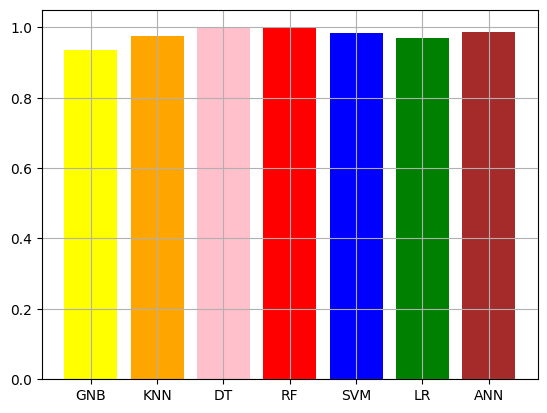

In [ ]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

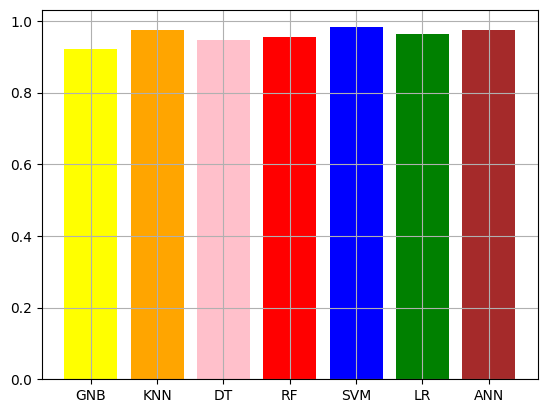

In [ ]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

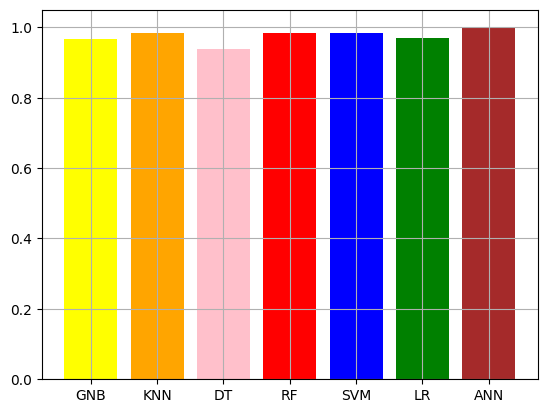

In [ ]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

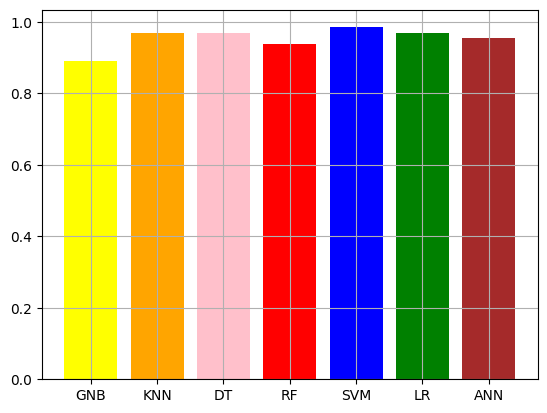

In [ ]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()